### Problem Set #4
#### MACS 30250, Dr. Evans and Dr. Soltoff 
#### Due Saturday, June 8 at 11:59pm
#### Haowen Shang

#### 1. Discrete approximation of an AR(1) process.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy.linalg as LA

#### (a)

In [2]:
rho = 0.85
mu = 11.4
sigma = 0.7
T = 500

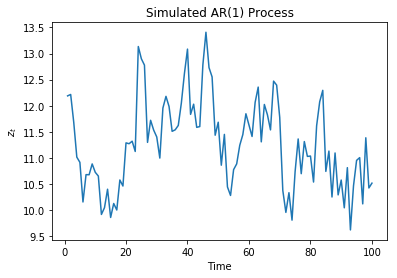

In [3]:
unif_vec = sts.uniform.rvs(loc=0, scale=1, size=T, random_state=25)
eps_vec = sts.norm.ppf(unif_vec, loc=0, scale=sigma)

z = np.zeros(T+1)
z[0] = mu

for i in range(1, T+1):
    z[i] = rho * z[i-1] + (1 - rho) * mu + eps_vec[i-1]

plt.plot(np.arange(1, 101), z[1:101])
plt.xlabel('Time')
plt.ylabel('$z_t$')
plt.title("Simulated AR(1) Process")
plt.show()

#### (b)

In [4]:
z_vals = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 5)
print(z_vals)

[ 9.3  10.35 11.4  12.45 13.5 ]


#### (c)

In [5]:
z_cuts = 0.5 * z_vals[:-1] + 0.5 * z_vals[1:]
P_hat = np.zeros((5, 5))
z_t = z[0]
bin_t = 3

In [6]:
for z_t1 in z:
    if z_t1 <= z_cuts[0]:
        bin_t1 = 1
    elif z_t1 <= z_cuts[1]:
        bin_t1 = 2
    elif z_t1 <= z_cuts[2]:
        bin_t1 = 3
    elif z_t1 <= z_cuts[3]:
        bin_t1 = 4
    else:
        bin_t1 = 5
    P_hat[bin_t - 1][bin_t1 - 1] += 1
    bin_t = bin_t1
    z_t = z_t1
    
for i in range(5):
    P_hat[i][:] = P_hat[i][:] / sum(P_hat[i][:])
    
print("Transition matrix Phat is\n", P_hat)

Transition matrix Phat is
 [[0.69387755 0.26530612 0.04081633 0.         0.        ]
 [0.09166667 0.55       0.325      0.03333333 0.        ]
 [0.03030303 0.21818182 0.48484848 0.23030303 0.03636364]
 [0.         0.04201681 0.34453782 0.50420168 0.1092437 ]
 [0.         0.         0.04166667 0.35416667 0.60416667]]


#### (d)

In [7]:
P_hat_3 = P_hat @ P_hat @ P_hat
print("Transition probability from bin 3 at t to bin 5 at t+3:", P_hat_3[2][4])

Transition probability from bin 3 at t to bin 5 at t+3: 0.08032301133392175


#### (e)

In [8]:
X_0 = np.array([[0.2], [0.2], [0.2], [0.2], [0.2]])
X_stat = np.dot(LA.matrix_power(P_hat.T, 100), X_0)
X_stat_new = np.dot(LA.matrix_power(P_hat.T, 101), X_0)
print(X_stat - X_stat_new)
print("Clearly steady state has been reached by the 100th iteration")
print("The steady state vector is:\n",X_stat)

[[ 7.34134975e-15]
 [ 6.27276009e-15]
 [-1.33226763e-15]
 [-7.18869408e-15]
 [-5.13478149e-15]]
Clearly steady state has been reached by the 100th iteration
The steady state vector is:
 [[0.10436378]
 [0.24106445]
 [0.32506724]
 [0.23483199]
 [0.09467253]]


#### (f)

In [9]:
z_prime = np.zeros(T + 1)
bin_t = 2
z_prime[0] = z_vals[2]
np.random.seed(25)
for i in range(T):
    z_t1 = np.random.choice(z_vals, p=P_hat[bin_t][:].flatten())
    z_prime[i+1] = z_t1
    if z_t1 <= z_cuts[0]:
        bin_t = 0
    elif z_t1 <= z_cuts[1]:
        bin_t = 1
    elif z_t1 <= z_cuts[2]:
        bin_t = 2
    elif z_t1 <= z_cuts[3]:
        bin_t = 3
    else:
        bin_t = 4

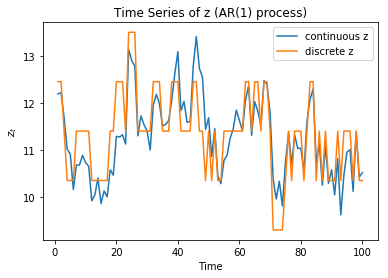

In [10]:
plt.plot(np.arange(1,101), z[1:101], label="continuous z")
plt.plot(np.arange(1,101), z_prime[1:101], label="discrete z")
plt.xlabel("Time")
plt.ylabel("$z_t$")
plt.title("Time Series of z (AR(1) process)")
plt.legend()
plt.show()